In [142]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [143]:
def classify_shape(path:str):
    '''Function to classify a shape by its contours.
    
    Args:
    path : path to image file (str).
    '''
    image = cv2.imread(path)
    
    # changing to gray
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Thresholding
    ret, thresh = cv2.threshold(gray, 127, 255, 1)
    # Extract Contours
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
    i =0 
    for cnt in contours:
        i+=1
        # Get approximate polygons
        approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)

        if len(approx) == 3:
            shape_name = "Triangle"
            cv2.drawContours(image,[cnt],0,(0,255,0),-1)

            # Find contour center to place text at the center
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])# x coordinate
            cy = int(M['m01'] / M['m00'])# y coordinate
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_TRIPLEX   , 2, (0, 0, 0), 2)

        elif len(approx) == 4:
            x,y,w,h = cv2.boundingRect(cnt)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])# x coordinate
            cy = int(M['m01'] / M['m00'])# y coordinate

            # Check to see if 4-side polygon is square or rectangle
            # cv2.boundingRect returns the top left and then width and 
            if abs(w-h) <= 3:
                shape_name = "Square"

                # Find contour center to place text at the center
                cv2.drawContours(image, [cnt], 0, (0, 125 ,255), -1)
                cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_TRIPLEX   , 2, (0, 0, 0), 2)
            else:
                shape_name = "Rectangle"

                # Find contour center to place text at the center
                cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
                M = cv2.moments(cnt)
                cx = int(M['m10'] / M['m00'])# x coordinate
                cy = int(M['m01'] / M['m00'])# y coordinate
                cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_TRIPLEX   , 2, (0, 0, 0), 2)

        elif len(approx) == 10:
            shape_name = "Star"
            cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00']) # x coordinate
            cy = int(M['m01'] / M['m00']) # y coordinate
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_TRIPLEX   , 2, (0, 0, 0),2)


        elif len(approx) >= 11:
            shape_name = "Circle"
            cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])# x coordinate
            cy = int(M['m01'] / M['m00'])# y coordinate
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_TRIPLEX   , 2, (0, 0, 0), 2)

        plt.figure(figsize = (10,10))
        plt.title(f'Countor {i}')
        plt.imshow(image)


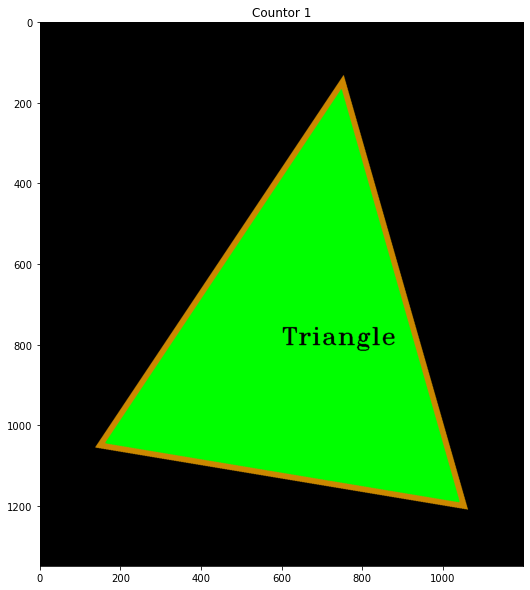

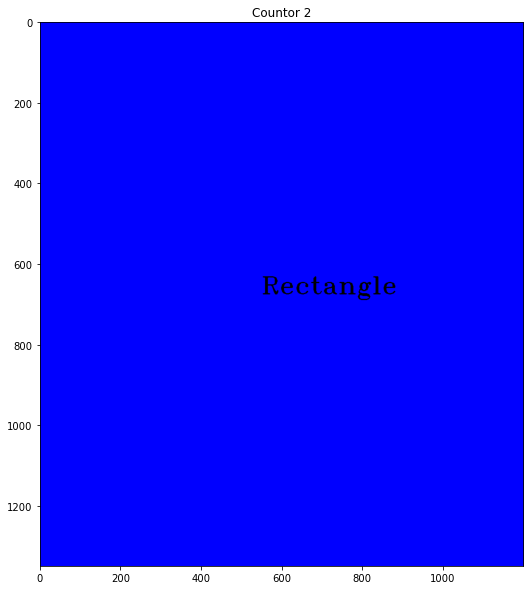

In [144]:
classify_shape('img/1200px-Triangle_illustration.svg.png')

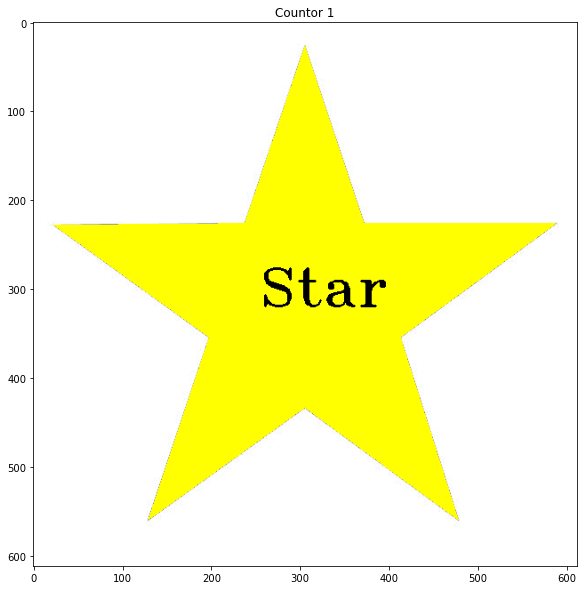

In [145]:
classify_shape('img/istockphoto-1129712692-612x612.jpg')

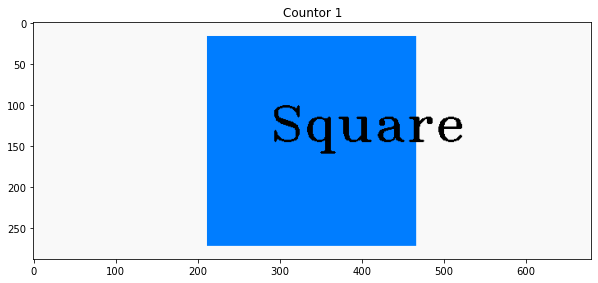

In [146]:
classify_shape('img/1563506098_area-of-the-square.png')